In [7]:
pip install missingno

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [14]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt

In [10]:
data_hmeq=pd.read_csv('hmeq.csv')
data_hmeq.head(10)

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN
5,1,1700,30548.0,40320.0,HomeImp,Other,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614
6,1,1800,48649.0,57037.0,HomeImp,Other,5.0,3.0,2.0,77.100000,1.0,17.0,NaN
7,1,1800,28502.0,43034.0,HomeImp,Other,11.0,0.0,0.0,88.766030,0.0,8.0,36.884894
8,1,2000,32700.0,46740.0,HomeImp,Other,3.0,0.0,2.0,216.933333,1.0,12.0,NaN
9,1,2000,NaN,62250.0,HomeImp,Sales,16.0,0.0,0.0,115.800000,0.0,13.0,NaN


In [11]:
hmeq=data_hmeq.copy()
hmeq=hmeq.rename(columns={
    'BAD': 'reponse',
    'LOAN' : 'montant_pret',
    'MORTDUE': 'hypo',
    'VALUE' : 'valeur_prop',
    'REASON':'but',
    'JOB' :'emploi',
    'YOJ' : 'annee_emploi',
    'DEROG':'signal',
    'DELINQ' :'cred_souffre',
    'CLAGE' : 'age_cred',
    'NINQ' :'nbre_demande',
    'CLNO': 'nbre_credit',
    'DEBTINC' : 'dette_rev'
})
hmeq.head(5)

,reponse,montant_pret,hypo,valeur_prop,but,emploi,annee_emploi,signal,cred_souffre,age_cred,nbre_demande,nbre_credit,dette_rev
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [12]:
hmeq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   reponse       5960 non-null   int64  
 1   montant_pret  5960 non-null   int64  
 2   hypo          5442 non-null   float64
 3   valeur_prop   5848 non-null   float64
 4   but           5708 non-null   object 
 5   emploi        5681 non-null   object 
 6   annee_emploi  5445 non-null   float64
 7   signal        5252 non-null   float64
 8   cred_souffre  5380 non-null   float64
 9   age_cred      5652 non-null   float64
 10  nbre_demande  5450 non-null   float64
 11  nbre_credit   5738 non-null   float64
 12  dette_rev     4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


Visualisation graphique des données manquantes

<Figure size 432x288 with 0 Axes>

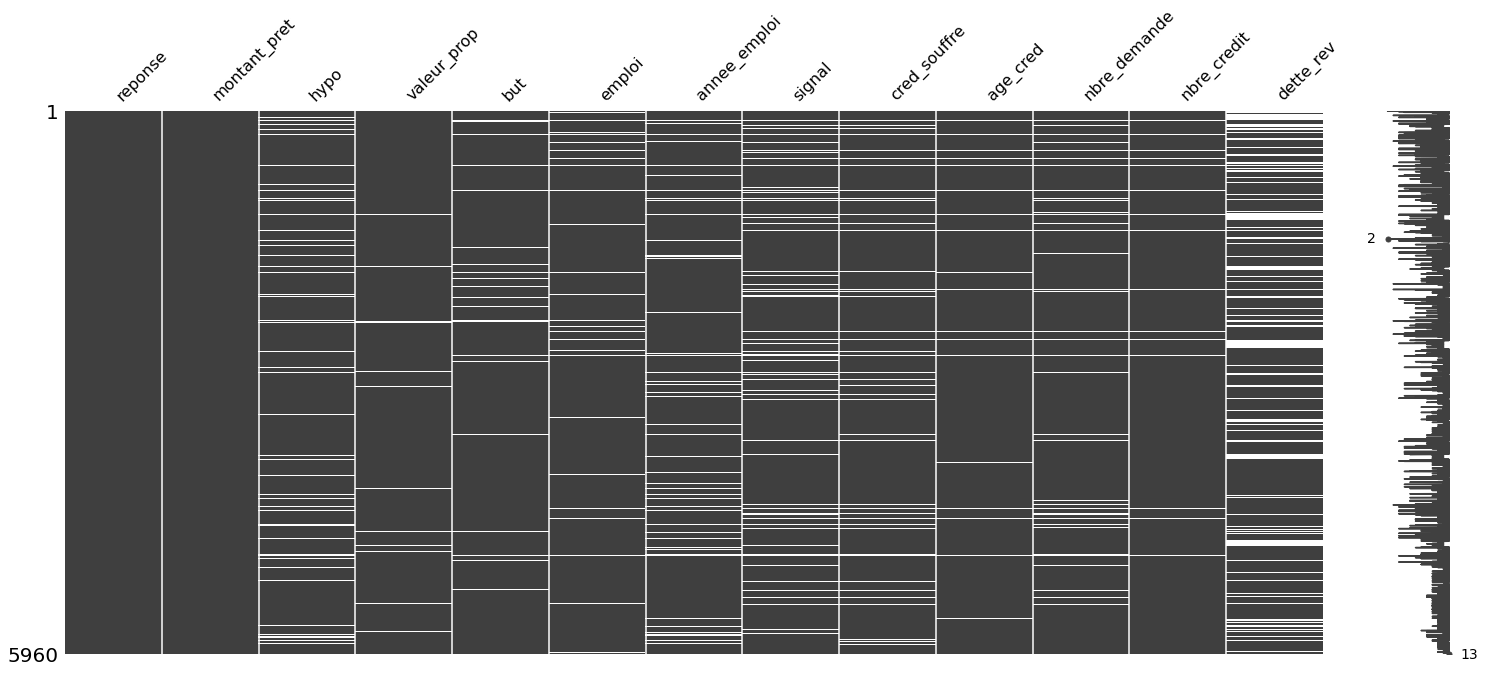

In [15]:
plt.figure()
msno.matrix(hmeq)
plt.show()

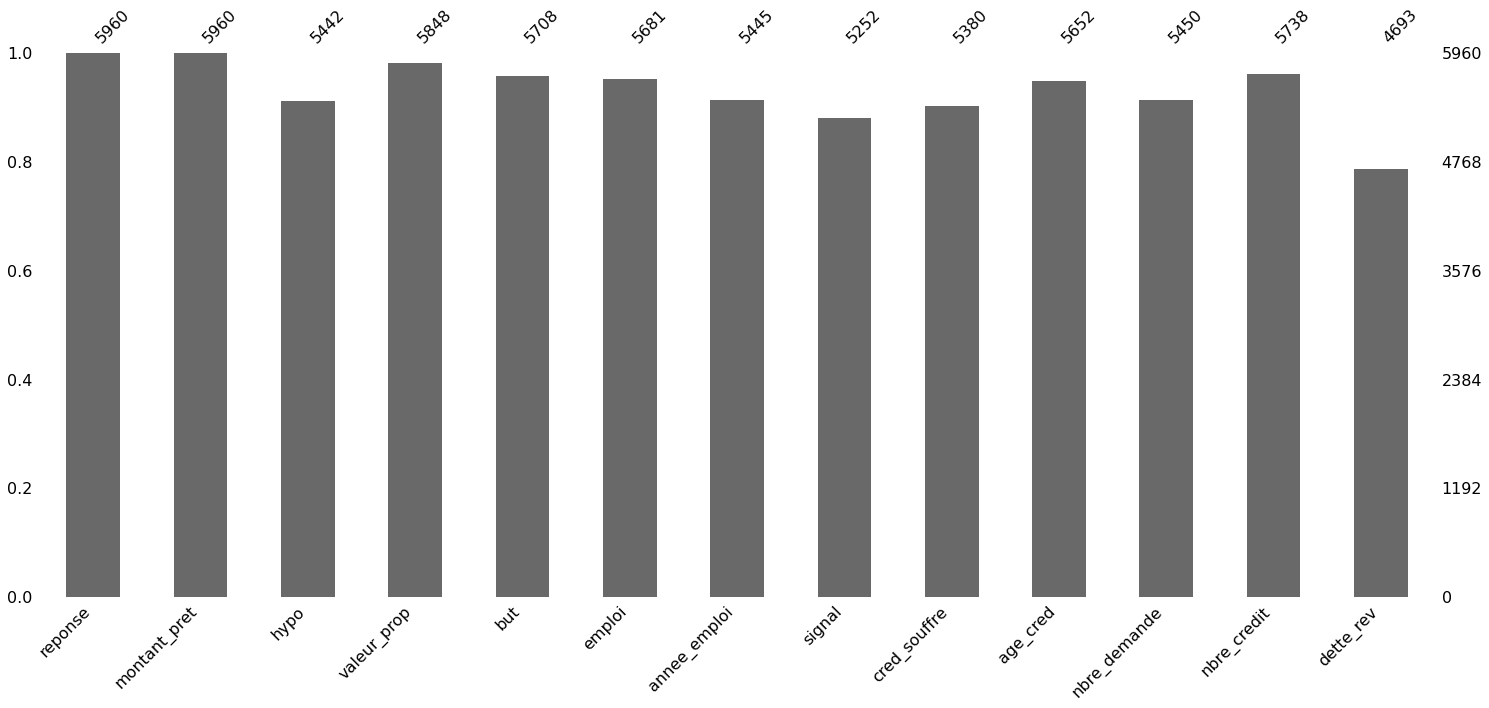

In [16]:
plt.figure()
msno.bar(hmeq)
plt.show()

Correlation entre les données manquantes

<Figure size 432x288 with 0 Axes>

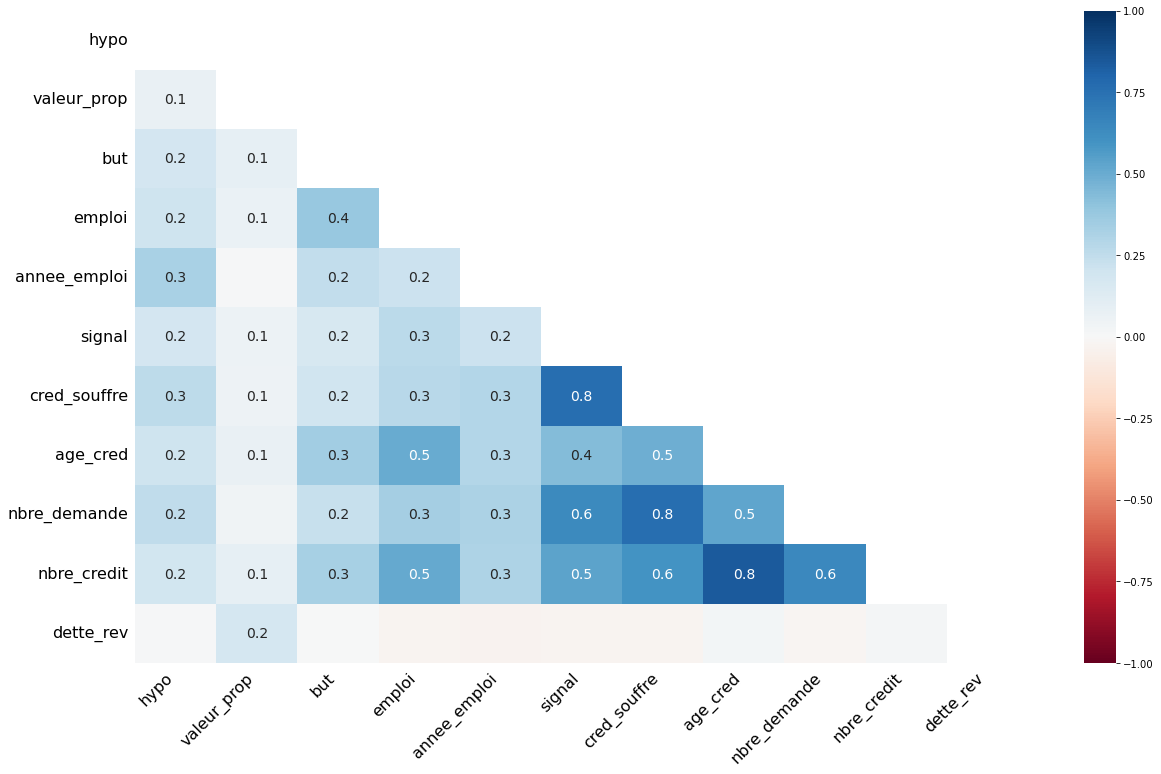

In [17]:
plt.figure()
msno.heatmap(hmeq)
plt.show()

<Figure size 432x288 with 0 Axes>

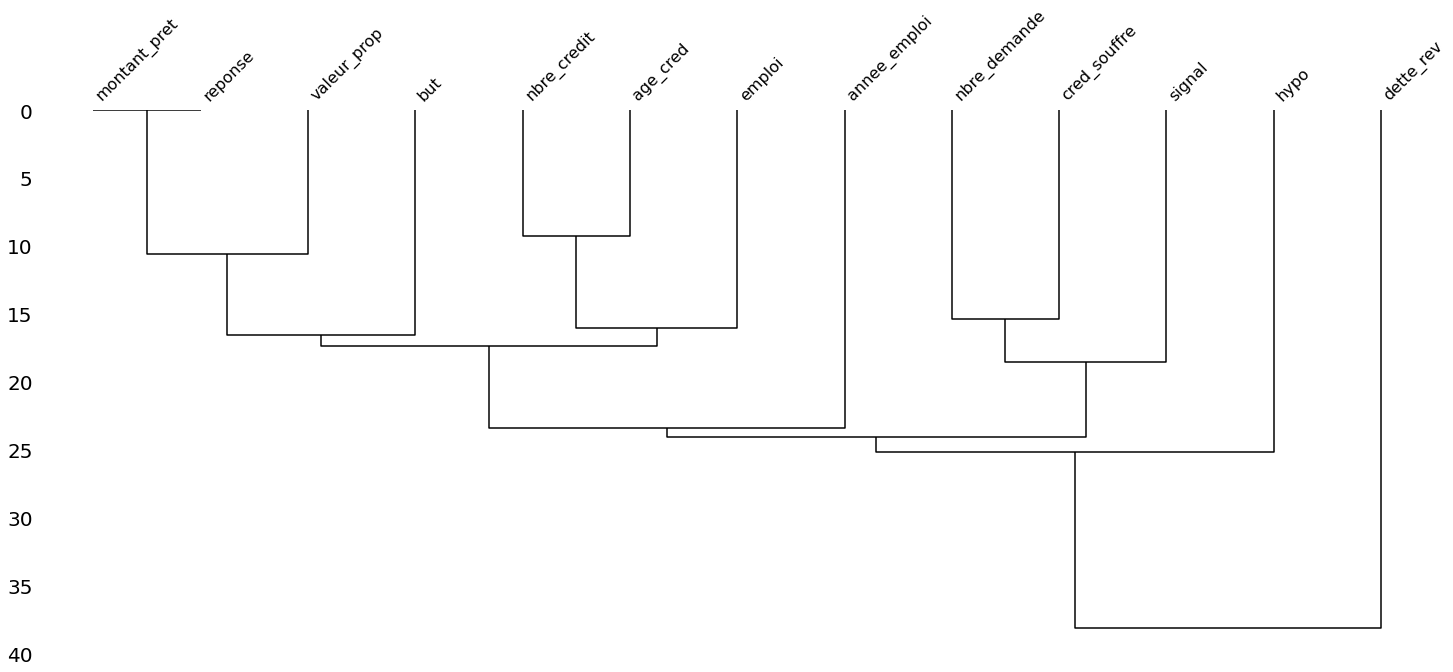

In [18]:
###Variables très corrélées
plt.figure()
msno.dendrogram(hmeq)
plt.show()

Proportion de données manquantes

In [20]:
mis_data=hmeq.isnull().sum()
mis_data

reponse            0
montant_pret       0
hypo             518
valeur_prop      112
but              252
emploi           279
annee_emploi     515
signal           708
cred_souffre     580
age_cred         308
nbre_demande     510
nbre_credit      222
dette_rev       1267
dtype: int64

In [23]:
mis_prop=(mis_data/len(hmeq))*100
mis_prop

reponse          0.000000
montant_pret     0.000000
hypo             8.691275
valeur_prop      1.879195
but              4.228188
emploi           4.681208
annee_emploi     8.640940
signal          11.879195
cred_souffre     9.731544
age_cred         5.167785
nbre_demande     8.557047
nbre_credit      3.724832
dette_rev       21.258389
dtype: float64

In [25]:
mis_table=pd.DataFrame({'Nbre de donnees manq':mis_data,
                               'Pourcentage':mis_prop})
mis_table

,Nbre de donnees manq,Pourcentage
reponse,0,0.000000
montant_pret,0,0.000000
hypo,518,8.691275
valeur_prop,112,1.879195
but,252,4.228188
emploi,279,4.681208
annee_emploi,515,8.640940
signal,708,11.879195
cred_souffre,580,9.731544
age_cred,308,5.167785


Récuperer les variables dont les proportions de données sont en dessous de 20%

In [102]:
var_cat=[]
var_num=[]
for var in hmeq.columns:
    if hmeq[var].dtype=='object':
        var_cat.append(var)
    else:
        var_num.append(var)
        
####
varcat_imput=[]
varnum_imput=[]
varnum_KNN=[]

for var in var_cat:
    if (mis_prop[var]<=20) &  (mis_prop[var]>0):
        varcat_imput.append(var)
for var in var_num:
    if (mis_prop[var]<=20) &  (mis_prop[var]>0):
        varnum_imput.append(var)
    elif mis_prop[var]>20:
        varnum_KNN.append(var)
        

['dette_rev']

Imputation par la médiane

In [62]:
for i in range(len(var_imput)):
    Med=hmeq[var_imput[i]].median()
    hmeq[var_imput[i]+'_new']=hmeq[var_imput[i]].fillna(Med)

hypo_new
valeur_prop_new
but_new
emploi_new
annee_emploi_new
signal_new
cred_souffre_new
age_cred_new
nbre_demande_new
nbre_credit_new
